# Association rule mining
#### 08/11/2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the groceries.txt file
with open('groceries.txt') as file:
    data = file.read().splitlines()
# Split each line by commas to create the baskets
baskets = [line.split(',') for line in data]
# Transform the list, with one-hot encoding
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
baskets_df = a.fit(baskets).transform(baskets)
df = pd.DataFrame(baskets_df,columns=a.columns_)
df = df.replace(False,0)
df = df.replace(True,1)
df[:10]

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
from mlxtend.frequent_patterns import apriori, association_rules
# Apply the apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=1)
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
# Inspect the rules
rules
# Set thresholds for lift and confidence
selected_rules = rules[(rules['lift'] > 1.5) & (rules['confidence'] > 0.4)]
selected_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315,0.389597
75,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,0.013395,1.480817,0.514659
81,(butter milk),(whole milk),0.027961,0.255516,0.011591,0.414545,1.622385,0.004447,1.271634,0.394659
86,(chicken),(other vegetables),0.042908,0.193493,0.017895,0.417062,2.155439,0.009593,1.383521,0.560090
91,(chicken),(whole milk),0.042908,0.255516,0.017590,0.409953,1.604411,0.006627,1.261736,0.393607
...,...,...,...,...,...,...,...,...,...,...
564,"(rolls/buns, yogurt)",(whole milk),0.034367,0.255516,0.015557,0.452663,1.771563,0.006775,1.360192,0.451027
570,"(tropical fruit, root vegetables)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553,0.563627
576,"(root vegetables, yogurt)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594,0.560625
588,"(tropical fruit, yogurt)",(whole milk),0.029283,0.255516,0.015150,0.517361,2.024770,0.007668,1.542528,0.521384


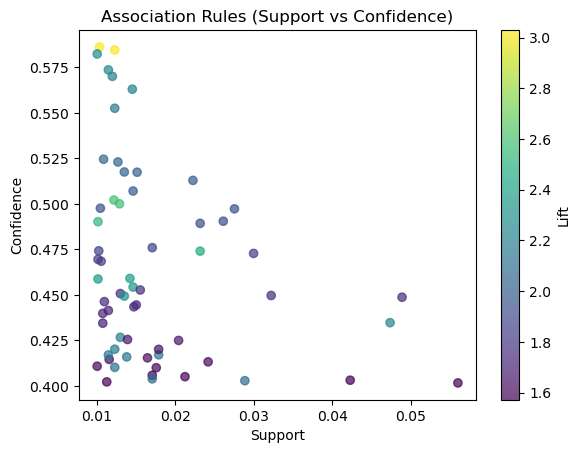

In [4]:
import networkx as nx
# Scatter plot of Support vs Confidence, colored by Lift
plt.scatter(selected_rules['support'], selected_rules['confidence'], c=selected_rules['lift'], cmap='viridis', alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(label='Lift')
plt.title('Association Rules (Support vs Confidence)')
plt.show()

In [5]:
# Graph-based visualization
G = nx.DiGraph()
for _, row in selected_rules.iterrows():
    for lhs in row['antecedents']:
        for rhs in row['consequents']:
            G.add_edge(lhs, rhs, weight=row['lift'])

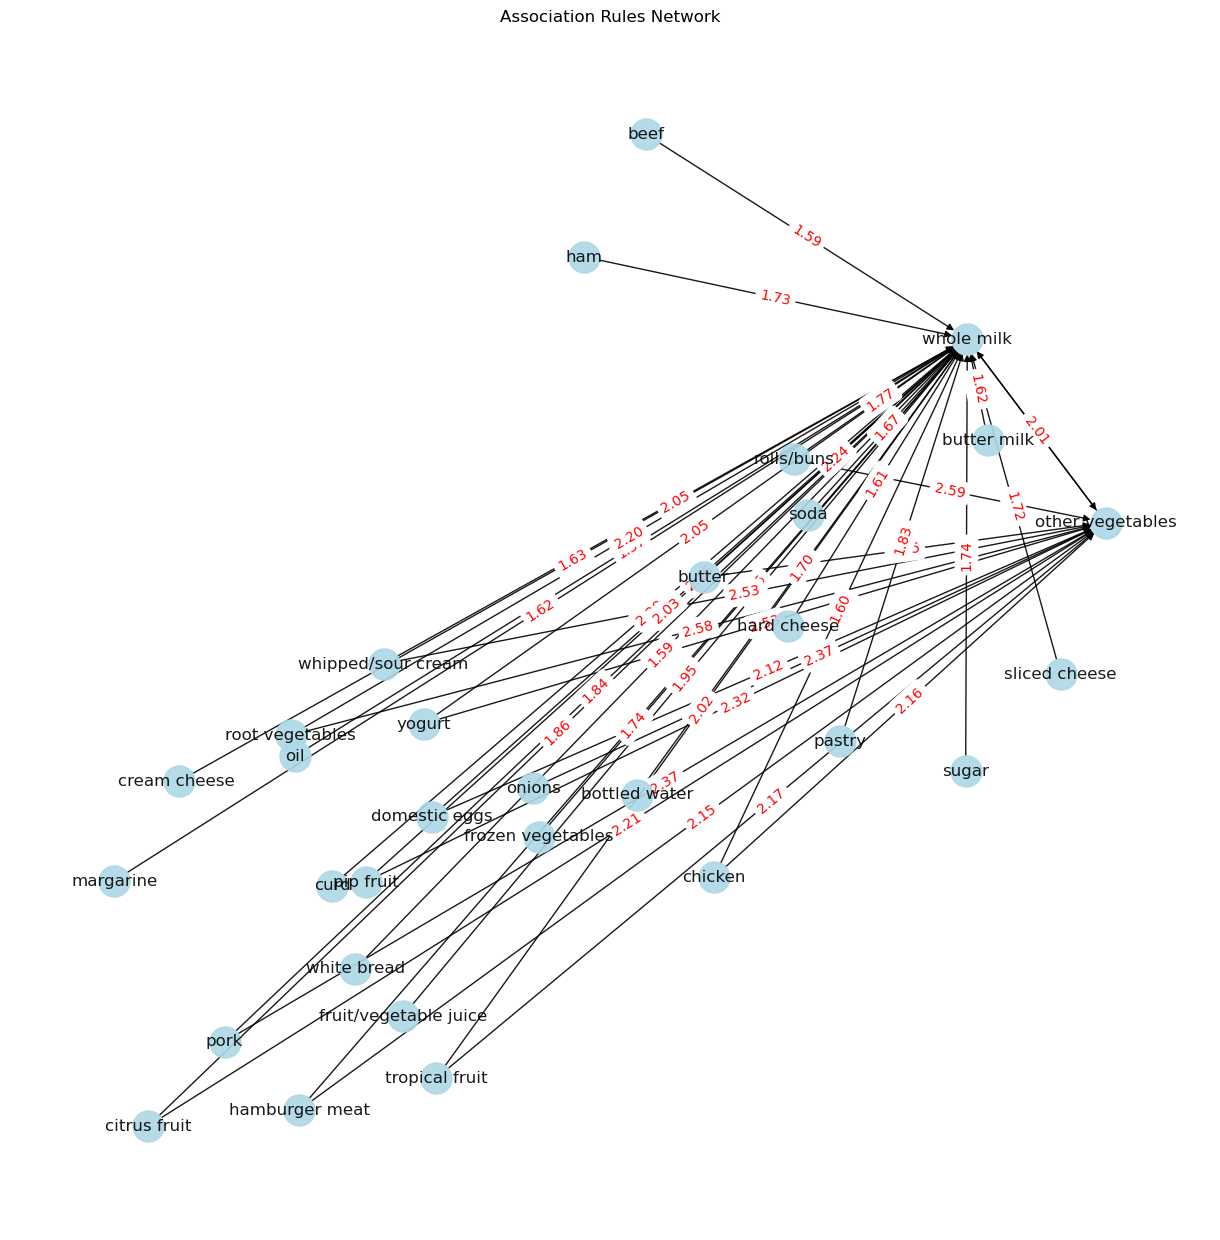

In [6]:
# Plot the graph
pos = nx.spring_layout(G, k=0.15, iterations=20)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, edge_color='black', width=1, linewidths=1, node_size=500, node_color='lightblue', alpha=0.9, labels={node: node for node in G.nodes()})
nx.draw_networkx_edge_labels(G, pos, edge_labels={(lhs, rhs): f'{d["weight"]:.2f}' for lhs, rhs, d in G.edges(data=True)}, font_color='red')
plt.title('Association Rules Network')
plt.show()

To identify which products are most frequently bought together by customers, we initially set a Lift threshold greater than 1.5. This threshold helps focus on associations that are reasonably strong. We experimented with a higher Lift threshold (greater than 2) to identify even stronger associations, but this stricter threshold filtered out almost all the rules, leaving only four pairs of antecedents and consequents. To balance capturing meaningful rules while maintaining a manageable number, we decided to use a Lift threshold greater than 1.5.
Additionally, we tested various combinations of Lift and Confidence to evaluate the reliability of these associations:
1.	(Lift > 1.5, Confidence > 0.4) – Resulted in a reasonable number of rules.
2.	(Lift > 1.5, Confidence > 0.5) – Left only four rules.
3.	(Lift > 2, Confidence > 0.4) – Reduced to one rule.
4.	(Lift > 2, Confidence > 0.5) – Also left only one rule, with the highest probability of being bought together.
Given these results, we chose the combination of (Lift > 1.5, Confidence > 0.4) as it allows us to discover not only that products like whole milk are frequently bought with other items, but also that various vegetables are commonly purchased alongside other products.

#### Whole Milk as a Frequent Item:
- Whole milk emerged as the most frequently purchased item, appearing in 2,513 transactions. Its frequent occurrence suggests that it serves as a common companion to a variety of other items.

#### High Confidence and Lift Combinations:
- The rules {curd, yogurt} &rarr; {whole milk} and {butter, other vegetables} &rarr; {whole milk} have high confidence and lift but low support.
- These combinations are highly associated with each other but do not occur frequently across all transactions. The high lift values (>2) indicate that the presence of the LHS significantly increases the likelihood of purchasing whole milk. Although these combinations are less frequent, they are highly predictive of a purchase of whole milk when they do occur. This can be used to create targeted promotions.

#### Dairy Grouping: Items such as yogurt, eggs, and sour cream frequently appear on the LHS with whole milk on the RHS.
- This pattern suggests that consumers tend to buy dairy products together, which makes logical sense given that these items are often used together in meals, particularly for breakfast. For example: the rule {curd, yogurt} &rarr; {whole milk} has a confidence of 58.2%, meaning that when curd and yogurt are bought together, whole milk is also purchased in 58.2% of these transactions.

#### Vegetable/Fruit Grouping:
- The rule {root vegetables, other vegetables} &rarr; {whole milk} and {fruit, other vegetables} &rarr; {whole milk} indicate a common purchasing pattern among customers who buy vegetables. These combinations suggest that consumers may be planning meals that include both root vegetables and other types of vegetables or pairing fruits with vegetables, possibly for smoothies. Grocery stores can consider placing whole milk near the produce section to capitalize on this pattern.

#### Conclusion:
#### The patterns suggest that whole milk is a central item in many shopping baskets, particularly when customers are buying other dairy products or vegetables. These insights can guide product placement, promotions, and marketing strategies to optimize sales and enhance the shopping experience